## Rangkuman

Feature yang dipake dari TOR:
- Alkohol
- percentage expenditure
- BMI
- Hepatitis B

Feature tambahan yang mungkin dipake (revisi kalo ada):
- Measless 
- Diptheria
- Polio
- Adult Mortality
- income composition
- Life expectancy
- Schooling

Feature yang ga di drop untuk keperluan lain:
- Country
- Year
- Status

Yang Di drop: (emang ada beberapa yang juga penting atau justru penting semua, tapi kita pilihnya yang paling penting kalo ga terlalu banyak parameternya)
- infant deaths (lebih penting dan jelas yang dewasa)
- under-five deaths
- Total expenditure
- HIV/AIDS
- GDP
- Population
- thinness 1-19 years
- thinness 5-9 years
- Income composition

# 0 Import libraries & Preprocessing(?)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
# Cek ada berapa kategori dari setiap fitur, misal ada 193 negara total, dlsb
data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness 1-19 years                 200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

## Cleaning Data

In [34]:
# Drop kolom-kolom yang tidak terpakai
# data = data.drop([
#     "infant deaths", 
#     "under-five deaths", 
#     "Total expenditure", 
#     "HIV/AIDS",
#     "GDP",
#     "Population",
#     "thinness 1-19 years",
#     "thinness 5-9 years",
#     "Income composition of resources"
#     ], axis=1)

data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [35]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [36]:
data = data.dropna(axis=0, how='any')

In [37]:
condition = (data['percentage expenditure'] == 0)
# data[condition]
rows_to_keep = ~condition
data = data[rows_to_keep] 
# dihapus karema 0 ini kemungkinan besar karena tidak diketahui, bukannya beneran 0
# jadi karena gamau buat hasilnya bias mendingan dihapus aja

# 1 Visualisasi life expentancy dengan


## 1.1 Alkohol per kapita

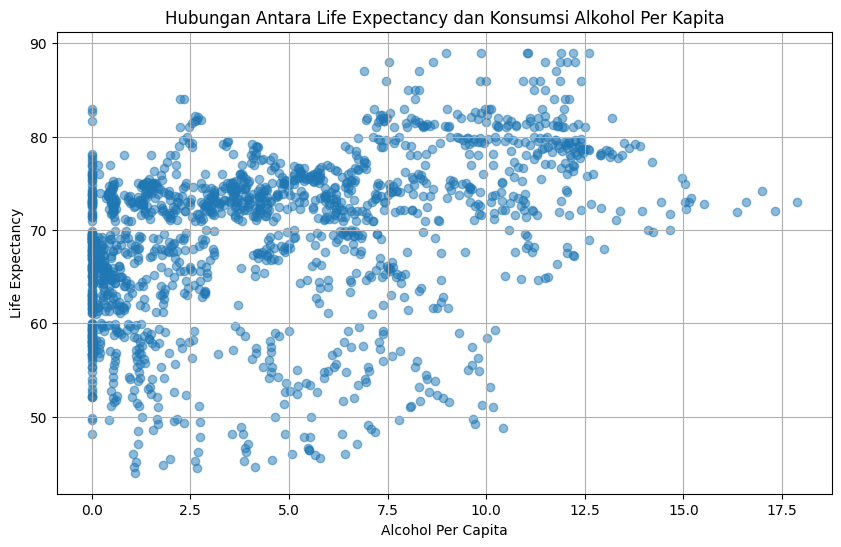

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Alcohol'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Konsumsi Alkohol Per Kapita')
plt.ylabel('Life Expectancy')
plt.xlabel('Alcohol Per Capita')
plt.grid(True)
plt.show()

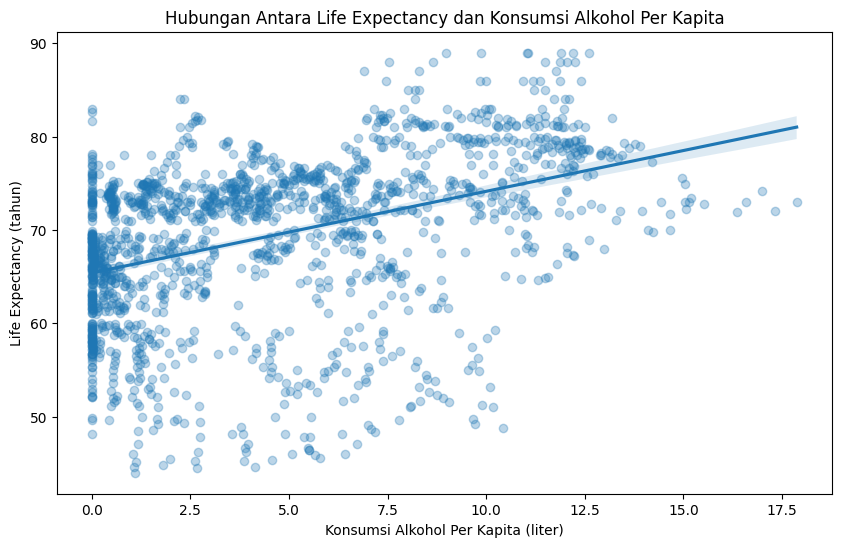

In [39]:
# Scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='Alcohol', y='Life expectancy', data=data, scatter_kws={'alpha': 0.3})
plt.title('Hubungan Antara Life Expectancy dan Konsumsi Alkohol Per Kapita')
plt.xlabel('Konsumsi Alkohol Per Kapita (liter)')
plt.ylabel('Life Expectancy (tahun)')
plt.show()

In [40]:
# data['Life expectancy', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 'Schooling']
heat_data = data.drop([
    'Country', 
    'Year', 
    'Status'
    ], axis=1)

heat_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


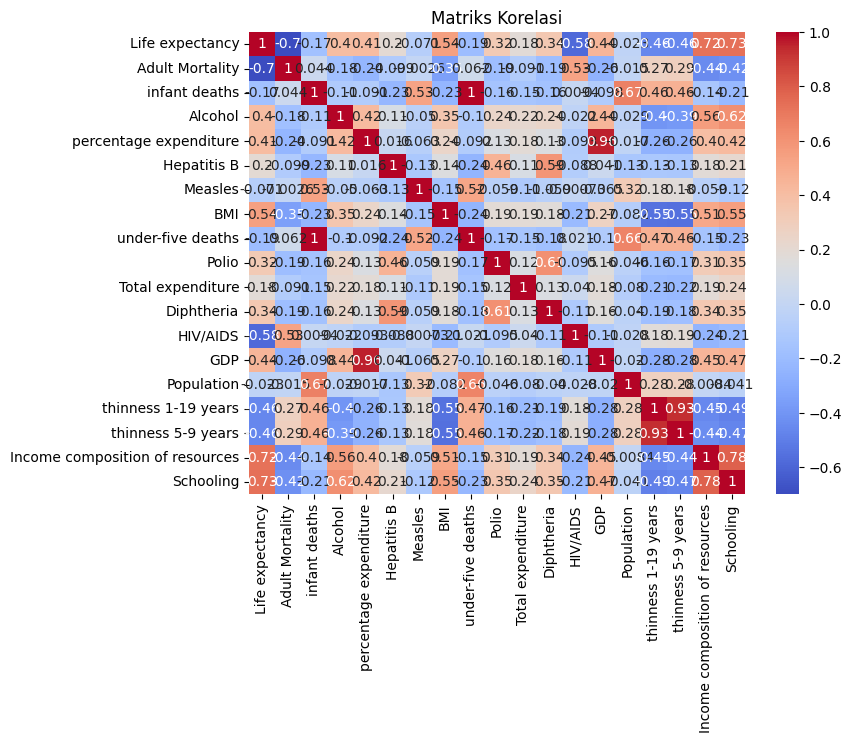

In [41]:
# Matriks korelasi dengan peta panas
plt.figure(figsize=(8, 6))
sns.heatmap(heat_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

## 1.2 Percentage Expenditure

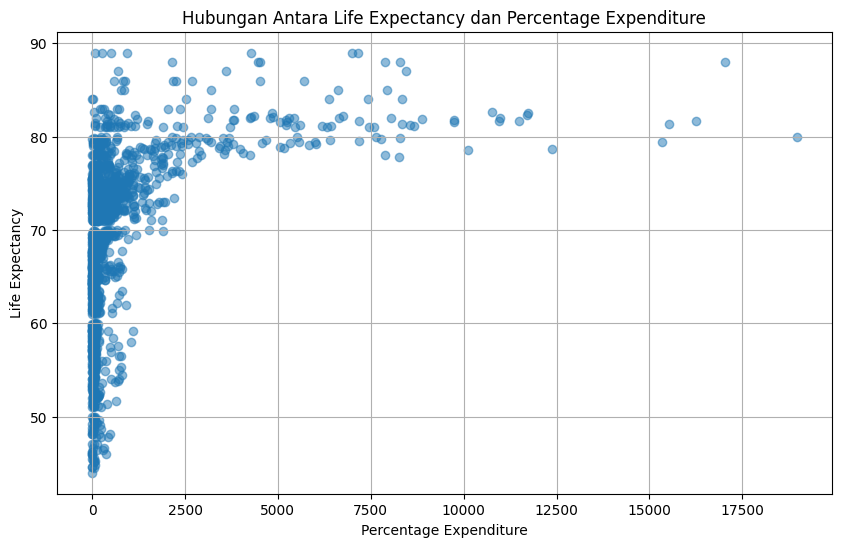

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(data['percentage expenditure'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.grid(True)
plt.show()

## 1.3 BMI

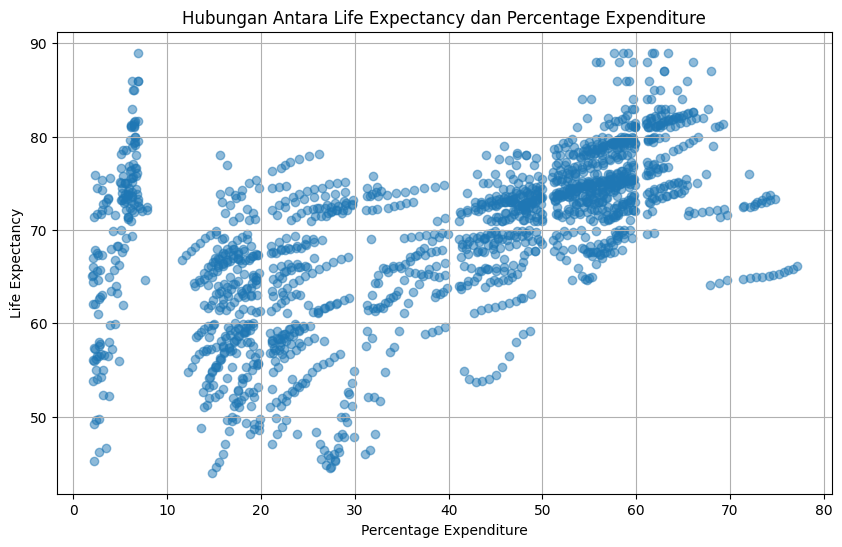

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(data['BMI'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.grid(True)
plt.show()

## 1.4 Hepatitis B Percentage

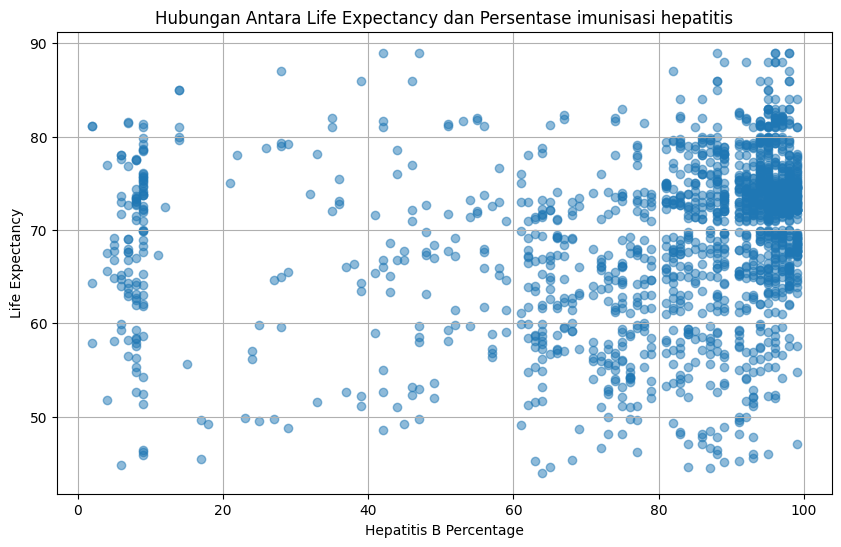

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Hepatitis B'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Persentase imunisasi hepatitis')
plt.ylabel('Life Expectancy')
plt.xlabel('Hepatitis B Percentage')
plt.grid(True)
plt.show()

# 2 Regresi untuk mencari hubungan antara, bilamana relevan

## 2.1 Alkohol per kapita

## 2.2 Percentage Expenditure

## 2.3 BMI

## 2.4 Hepatitis B Percentage

# 3 Inferensi statistika u/ intv kepcy koef hasil reg

# 4 Visualisasi data relevan